In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the merged dataset
df = pd.read_csv('../../data/curated/merged_population_data.csv')

# 1. Initial Inspection
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics for numeric columns
print(df.head())  # Inspect the first few rows

# 2. Descriptive Statistics for Population in 2023, 2026, 2031, 2036
print("Descriptive Statistics for Population in 2023, 2026, 2031, and 2036")
print(df[['2023', '2026', '2031', '2036']].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GCCSA        522 non-null    object 
 1   SA4 Code     522 non-null    float64
 2   SA3 Code     522 non-null    float64
 3   SA2  code    522 non-null    float64
 4   Region Type  522 non-null    object 
 5   Region       522 non-null    object 
 6   2021         522 non-null    float64
 7   2026         522 non-null    float64
 8   2031         522 non-null    float64
 9   2036         522 non-null    float64
 10  2023         523 non-null    float64
dtypes: float64(8), object(3)
memory usage: 45.2+ KB
None
         SA4 Code      SA3 Code     SA2  code          2021          2026  \
count  522.000000    522.000000  5.220000e+02    522.000000    522.000000   
mean   209.159004  20918.714559  2.091885e+08  12543.720307  13757.902733   
std      4.148353    414.936293  4.149476e+06   5846.100167 

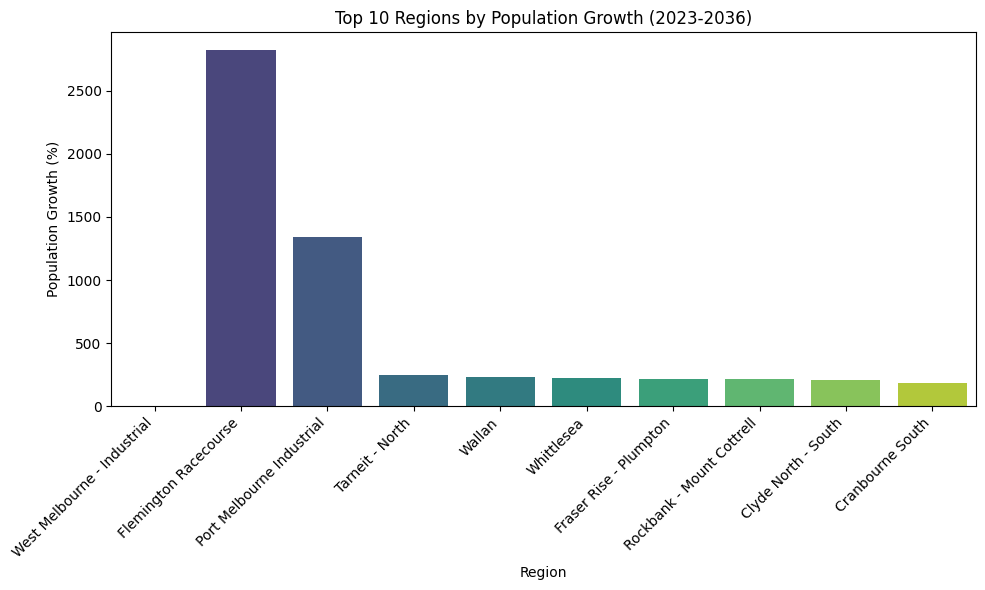

In [4]:
# Population Growth from 2023 to 2036
df['Growth_2023_2036'] = ((df['2036'] - df['2023']) / df['2023']) * 100

# Sort by growth to find regions with the highest growth
df_sorted_growth = df.sort_values(by='Growth_2023_2036', ascending=False)

# Plot top regions by population growth (2023 to 2036)
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Growth_2023_2036', data=df_sorted_growth.head(10), palette='viridis')
plt.title('Top 10 Regions by Population Growth (2023-2036)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Population Growth (%)')
plt.tight_layout()
plt.show()

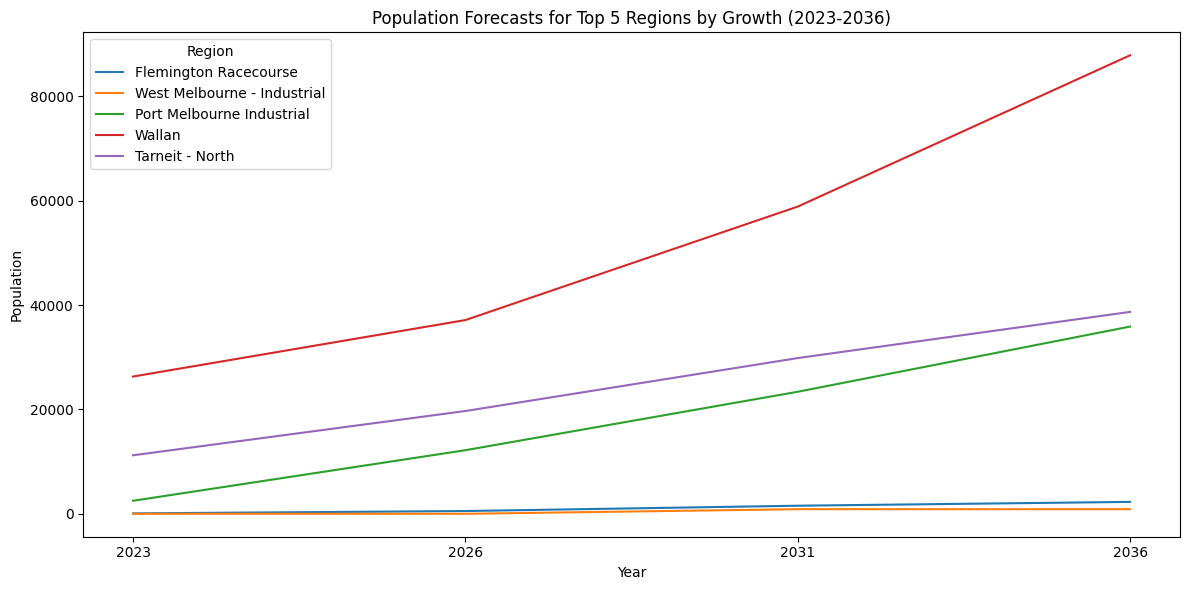

In [5]:
# Line Plot for Population Trends Over Time
df_melted = df.melt(id_vars=['Region'], value_vars=['2023', '2026', '2031', '2036'],
                    var_name='Year', value_name='Population')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Population', hue='Region', data=df_melted[df_melted['Region'].isin(df_sorted_growth['Region'].head(5))])
plt.title('Population Forecasts for Top 5 Regions by Growth (2023-2036)')
plt.ylabel('Population')
plt.tight_layout()
plt.show()